## Project Probability


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Descriptive Statistic
Pilih lima:
1. Rata-rata umur pengguna
2. Rata-rata nilai BMI dari pengguna yang merokok
3. Berapa rata rata umur pada data tersebut?
4. Berapa rata rata nilai BMI dari yang merokok?
5. Apakah variansi dari data charges perokok dan non perokok sama?
6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25
9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?


In [14]:
# Rata-rata umur data
avg_age = np.round(df['age'].mean(),2)
print(f"Rata-rata umur data: {avg_age}")

Rata-rata umur data: 39.21


In [13]:
# Rata-rata nilai BMI yang merokok
avg_bmi_smoker = round(df[df['smoker'] == 'yes']['bmi'].mean(),2)
print(f"Rata-rata BMI smokers: {avg_bmi_smoker}")

Rata-rata BMI smokers: 30.71


In [17]:
# Variansi charges dari perokok dan non perokok
df.groupby(['smoker'])['charges'].var()

smoker
no     3.592542e+07
yes    1.332073e+08
Name: charges, dtype: float64

In [21]:
# Rata-rata umur perempuan dan laki-laki perokok
df.groupby(['sex','smoker'])['age'].mean()

sex     smoker
female  no        39.691042
        yes       38.608696
male    no        39.061896
        yes       38.446541
Name: age, dtype: float64

In [22]:
# Rata-rata charges dari perokok dan non perokok
df.groupby(['smoker'])['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [23]:
# Rata-rata bmi dari perokok dan non perokok
df.groupby(['smoker'])['bmi'].mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

In [24]:
# Rata-rata bmi dari perempuan dan laki-laki
df.groupby(['sex'])['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

### Variabel Kategorik (PMF)
Pilih lima:
1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

Materi pertemuan : 1 - 8

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Gender dengan tagihan paling tinggi
df.groupby(['sex'])['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [32]:
# Distribusi peluang tagihan tiap region
round(df.groupby(['region'])['charges'].sum()/df['charges'].sum(),3)

region
northeast    0.245
northwest    0.227
southeast    0.302
southwest    0.226
Name: charges, dtype: float64

In [34]:
# Proporsi data per region
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [37]:
# Proporsi perokok atau non perokok
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

$$
\begin{align*}
P(A \ | \ B) &= \cfrac{n(A \cap B)}{n(B)} \\ 
 &= \cfrac{P(A \cap B)}{P(B)}
\end{align*}
$$

Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
- A = peluang perempuan
- B = peluang perokok

$$
\begin{align*}
P(\text{perempuan} \ | \ \text{perokok}) &= \cfrac{n(\text{perempuan} \cap \text{perokok})}{n(\text{perokok})}
\end{align*}
$$

In [46]:
n_perempuan_perokok = len(df[(df['sex'] == 'female') & (df['smoker']=='yes')])
n_perempuan_perokok

115

In [45]:
n_perokok = len(df[df['smoker']=='yes'])
n_perokok

274

In [48]:
#peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
p_perempuan_perokok = round((n_perempuan_perokok / n_perokok)*100,3)
print(f"peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok: {p_perempuan_perokok}%")

peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok: 41.971%


Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
- A = peluang laki-laki
- B = peluang perokok

In [49]:
n_laki_perokok = len(df[(df['sex'] == 'male') & (df['smoker']=='yes')])
n_laki_perokok

159

In [51]:
#peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
p_laki_perokok = round((n_laki_perokok / n_perokok)*100,3)
print(f"peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok: {p_laki_perokok}%")

peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok: 58.029%


###  Analisa Variabel Kontinu (CDF)
1. Mencari peluang besar tagihan berdasarkan BMI
2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan
tagihan kesehatan di atas 16.700.
3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah
perokok
4. Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
16.7k
5. Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

In [105]:
cdf_link = "https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/"

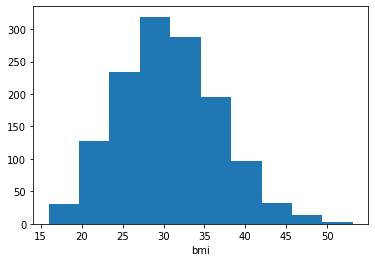

In [75]:
plt.hist(df['bmi'], bins=10)
plt.xlabel("bmi")
plt.show()

In [53]:
import scipy.stats as stats

In [70]:
count, bins_count = np.histogram(df['bmi'], bins=10)

In [73]:
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
cdf

array([0.02242152, 0.11733931, 0.2922272 , 0.53064275, 0.74588939,
       0.8916293 , 0.96337818, 0.98729447, 0.99775785, 1.        ])

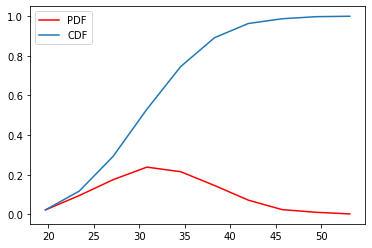

In [74]:
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan
tagihan kesehatan di atas 16.700.

In [85]:
mean_bmi = df['bmi'].mean()
var_bmi  = df['bmi'].var()

In [80]:
from scipy.stats import norm

In [87]:
x = 25
std_bmi = np.sqrt(var_bmi)
P2 = 1- norm.cdf(x, mean_bmi, std_bmi)

In [88]:
P2

0.823478163385892

In [89]:
mean_charges = df['charges'].mean()
var_charges  = df['charges'].var()

In [90]:
y = 16700
std_charges = np.sqrt(var_charges)
P3 = 1- norm.cdf(x, mean_charges, std_charges)
P3

0.8629694462694538

In [91]:
P2 * P3

0.71063649467211

3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah
perokok

In [93]:
p_perokok = len(df[df['smoker']=='yes'])/len(df)
p_perokok

0.20478325859491778

In [94]:
P3 * p_perokok

0.17672169527491055

Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700

In [14]:
smoker = df[df['smoker'] == 'yes']
smoker_bmi_25 = len(df[(df['bmi'] > 25) & (df['charges']>16700)])
charge_over = len(df[df['charges']>16700])

pmf = round(smoker_bmi_25/charge_over,2)
pmf

0.85

Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

In [17]:
charge_over =  len(df[(df['smoker'] == 'yes') & (df['charges']>16700)])
smoker = len( df[df['smoker'] == 'yes'])
pmf = round(charge_over/ smoker,2)
pmf

0.93

Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau 
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [102]:
charge_over =  len(df[df['charges']>16700])
bmi_25_atas = len(df[(df['bmi'] >25) &(df['charges'] > 16700)])
bmi_25_bawah = len(df[(df['bmi'] <25) &(df['charges'] > 16700)])

atas_25 = round(bmi_25_atas / charge_over,2)
bawah_25 = round(bmi_25_bawah / charge_over,2)
print(f"peluang seseorang dengan BMI diatas 25 mendapat tagihan kesehatan di atas 16.7k: {atas_25*100}%")
print(f"peluang seseorang dengan BMI dibawah 25 mendapat tagihan kesehatan di atas 16.7k: {bawah_25*100}%")

peluang seseorang dengan BMI diatas 25 mendapat tagihan kesehatan di atas 16.7k: 85.0%
peluang seseorang dengan BMI dibawah 25 mendapat tagihan kesehatan di atas 16.7k: 15.0%


Mana yang lebih mungkin terjadi  
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau 
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [104]:
charge_over =  len(df[(df['charges']>16700) & (df['bmi']>25)])

perokok_bmi_25_atas = len(df[(df['bmi'] > 25) & (df['smoker'] == 'yes') & (df['charges']>16700)])
non_perokok_bmi_25_atas = len(df[(df['bmi'] > 25) & (df['smoker'] == 'no') & (df['charges']>16700)])

pmf_perokok_bmi_25_atas = round(perokok_bmi_25_atas / charge_over,2)
pmf_non_perokok_bmi_25_atas = round(non_perokok_bmi_25_atas / charge_over,2)
print(f"peluang seseorang perokok dengan BMI diatas 25 mendapat tagihan kesehatan di atas 16.7k: {pmf_perokok_bmi_25_atas*100}%")
print(f"peluang seseorang non-perokok dengan BMI diatas 25 mendapat tagihan kesehatan di atas 16.7k: {pmf_non_perokok_bmi_25_atas*100}%")

peluang seseorang perokok dengan BMI diatas 25 mendapat tagihan kesehatan di atas 16.7k: 76.0%
peluang seseorang non-perokok dengan BMI diatas 25 mendapat tagihan kesehatan di atas 16.7k: 24.0%


###   Analisa Korelasi Variabel

In [33]:
import seaborn as sns

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
smoker = df[df['smoker'] == 'yes']
corr_age_bmi = np.corrcoef(smoker['age'],smoker['bmi'])
corr_age_bmi

array([[1.        , 0.05967388],
       [0.05967388, 1.        ]])

In [31]:
corr_charges_bmi = np.corrcoef(smoker['charges'],smoker['bmi'])
corr_charges_bmi

array([[1.        , 0.80648061],
       [0.80648061, 1.        ]])

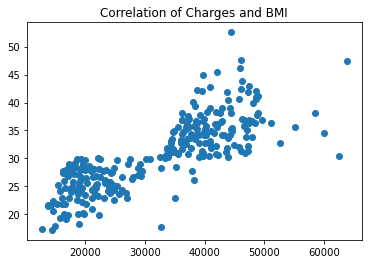

In [76]:
plt.scatter(smoker['charges'],smoker['bmi'])
plt.title('Correlation of Charges and BMI')
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Pengujian Hipotesis

Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [77]:
smoker = df[df['smoker'] == 'yes']
non_smoker = df[df['smoker'] == 'no']
a = 0.05

In [80]:
var_smoker = smoker['charges'].var()
var_non_smoker = non_smoker['charges'].var()
print('Variance Charges Smoker: %.4f'%(var_smoker))
print('Variance Charges Non-Smoker: %.4f'%(var_non_smoker))

Variance Charges Smoker: 133207311.2063
Variance Charges Non-Smoker: 35925420.4961


In [81]:
mean_smoker = smoker['charges'].mean()
print('Mean Charges Smoker: %.4f'%(mean_smoker))
mean_non_smoker = non_smoker['charges'].mean()
print('Mean Charges Non - Smoker: %.4f'%(mean_non_smoker))

Mean Charges Smoker: 32050.2318
Mean Charges Non - Smoker: 8434.2683


$$ H_0 : p_1 \geq p_2$$
$$ H_a : p_1 < p_2$$
- p1: charges for smokers
- p2: charges for non smokers


In [84]:
stat, p = ttest_ind(smoker['charges'],non_smoker['charges'], equal_var=False,alternative = 'less')
print('Statistics: %.4f, p-value: %.4f'%(stat,p))
if p > a:
    print('Terima null hypothesis')
else:
    print('Tolak null hypothesis')

Statistics: 32.7519, p-value: 1.0000
Terima null hypothesis


In [85]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(smoker['charges'],non_smoker['charges'], equal_var = False, alternative = 'less')
stat , p

(32.751887766341824, 1.0)

Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25

In [53]:
high_bmi = df[df['bmi'] > 25]
low_bmi = df[df['bmi'] < 25]

In [93]:
var_high_bmi = high_bmi['charges'].var()
print('Variance Charges of BMI > 25: %.4f'%(var_high_bmi))
var_low_bmi = low_bmi['charges'].var()
print('Variance Charges of BMI < 25: %.4f'%(var_low_bmi))

Variance Charges of BMI > 25: 164730179.6035
Variance Charges of BMI < 25: 56557707.4161


In [94]:
mean_high_bmi = high_bmi['charges'].mean()
print('Mean Charges of BMI > 25: %.4f'%(mean_high_bmi))
mean_low_bmi = low_bmi['charges'].mean()
print('Mean Charges of BMI < 25: %.4f'%(mean_low_bmi))

Mean Charges of BMI > 25: 13946.4760
Mean Charges of BMI < 25: 10282.2245


$$ H_0 : p_1 \geq p_2$$
$$ H_a : p_1 < p_2$$
- p1: charges for BMI > 25
- p2: charges for BMI < 25


In [95]:
stat, p = ttest_ind(high_bmi['charges'],low_bmi['charges'], equal_var=False,alternative = 'less')
print('Statistics: %.4f, p-value: %.4f'%(stat,p))
if p > a:
    print('Terima null hypothesis')
else:
    print('Tolak null hypothesis')

Statistics: 5.9299, p-value: 1.0000
Terima null hypothesis


Tagihan kesehatan laki-laki lebih besar dari perempuan

In [60]:
laki = df[df['sex'] == 'male']
wanita = df[df['sex']=='female']

In [96]:
mean_laki = laki['charges'].mean()
print('Mean Charges Laki-laki: %.4f'%(mean_laki))
mean_wanita = wanita['charges'].mean()
print('Mean Charges Wanita: %.4f'%(mean_wanita))

Mean Charges Laki-laki: 13956.7512
Mean Charges Wanita: 12569.5788


In [97]:
var_laki = laki['charges'].var()
print('Variance Charges Laki-laki: %.4f'%(var_laki))
var_wanita = wanita['charges'].var()
print('Variance Charges Wanita: %.4f'%(var_wanita))

Variance Charges Laki-laki: 168247513.2882
Variance Charges Wanita: 123848048.2885


$$ H_0 : p_1 \geq p_2$$
$$ H_a : p_1 < p_2$$
- p1: charges for Laki - Laki
- p2: charges for Wanita

In [100]:
stat, p = ttest_ind(laki['charges'],wanita['charges'], equal_var=False,alternative = 'less')
print('Statistics: %.4f, p-value: %.4f'%(stat,p))
if p > a:
    print('Terima null hypothesis')
else:
    print('Tolak null hypothesis')

Statistics: 2.1009, p-value: 0.9821
Terima null hypothesis


$$ H_0 : p_1 = p_2$$
$$ H_a : p_1 \neq p_2$$
- p1: charges for Laki - Laki
- p2: charges for Wanita

In [99]:
stat, p = ttest_ind(laki['charges'],wanita['charges'], equal_var=False)
print('Statistics: %.4f, p-value: %.4f'%(stat,p))
if p > a:
    print('Terima null hypothesis')
else:
    print('Tolak null hypothesis')

Statistics: 2.1009, p-value: 0.0358
Tolak null hypothesis
